In [2]:
import pandas as pd

# Load the dataset
df = pd.read_csv(r"C:\Users\PMLS\Downloads\online+shoppers+purchasing+intention+dataset\online_shoppers_intention.csv")


# Basic inspection
print("🔹 Shape:", df.shape)
print("\n🔹 Columns:", df.columns.tolist())
print("\n🔹 Info:")
print(df.info())
print("\n🔹 Missing values:")
print(df.isnull().sum())


🔹 Shape: (12330, 18)

🔹 Columns: ['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month', 'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType', 'Weekend', 'Revenue']

🔹 Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues  

In [3]:
# Check again for missing values
print("Missing values:\n", df.isnull().sum())

# Drop any rows with missing values (if any)
df = df.dropna()

# Encode categorical variables using Label Encoding
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

# Encode 'Month', 'VisitorType', 'Weekend', and 'Revenue'
df['Month'] = le.fit_transform(df['Month'])
df['VisitorType'] = le.fit_transform(df['VisitorType'])
df['Weekend'] = le.fit_transform(df['Weekend'])
df['Revenue'] = df['Revenue'].astype(int)  # Converts True/False to 1/0


Missing values:
 Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64


       Administrative  Administrative_Duration  Informational  \
count    12330.000000             12330.000000   12330.000000   
mean         2.315166                80.818611       0.503569   
std          3.321784               176.779107       1.270156   
min          0.000000                 0.000000       0.000000   
25%          0.000000                 0.000000       0.000000   
50%          1.000000                 7.500000       0.000000   
75%          4.000000                93.256250       0.000000   
max         27.000000              3398.750000      24.000000   

       Informational_Duration  ProductRelated  ProductRelated_Duration  \
count            12330.000000    12330.000000             12330.000000   
mean                34.472398       31.731468              1194.746220   
std                140.749294       44.475503              1913.669288   
min                  0.000000        0.000000                 0.000000   
25%                  0.000000        7.00000

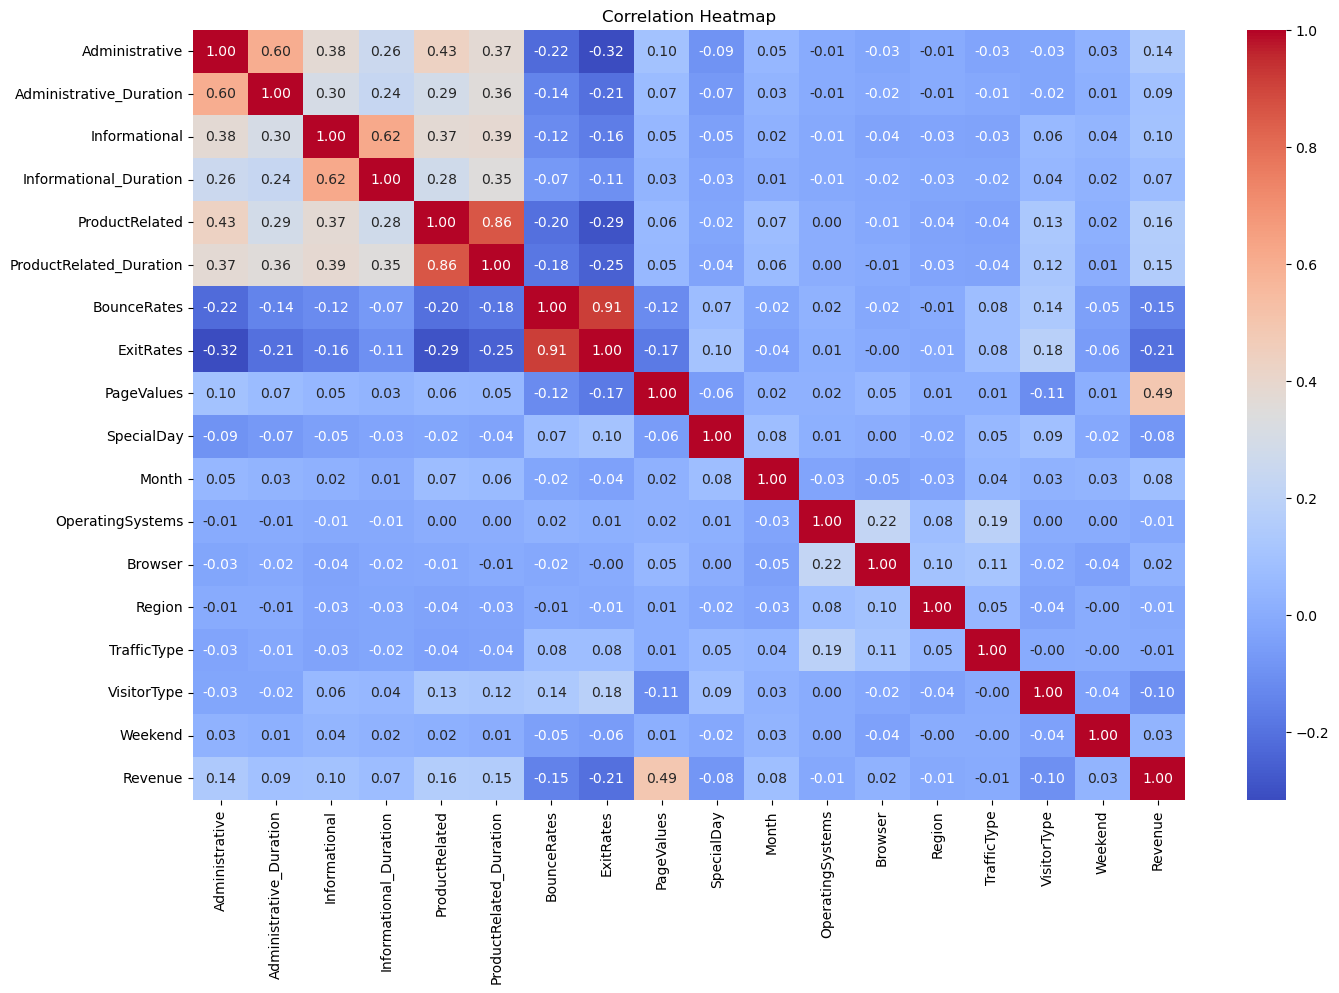

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Summary statistics
print(df.describe())

# Correlation heatmap
plt.figure(figsize=(16, 10))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


C:\Users\PMLS\AppData\Local\Temp\ipykernel_14040\2136712.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Revenue', y=col, palette='Set2')
C:\Users\PMLS\AppData\Local\Temp\ipykernel_14040\2136712.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Revenue', y=col, palette='Set2')
C:\Users\PMLS\AppData\Local\Temp\ipykernel_14040\2136712.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Revenue', y=col, palette='Set2')
C:\Users\PMLS\AppData\Local\Temp\ipykernel_14040\2136712.py:6: FutureWarning: 

Passi

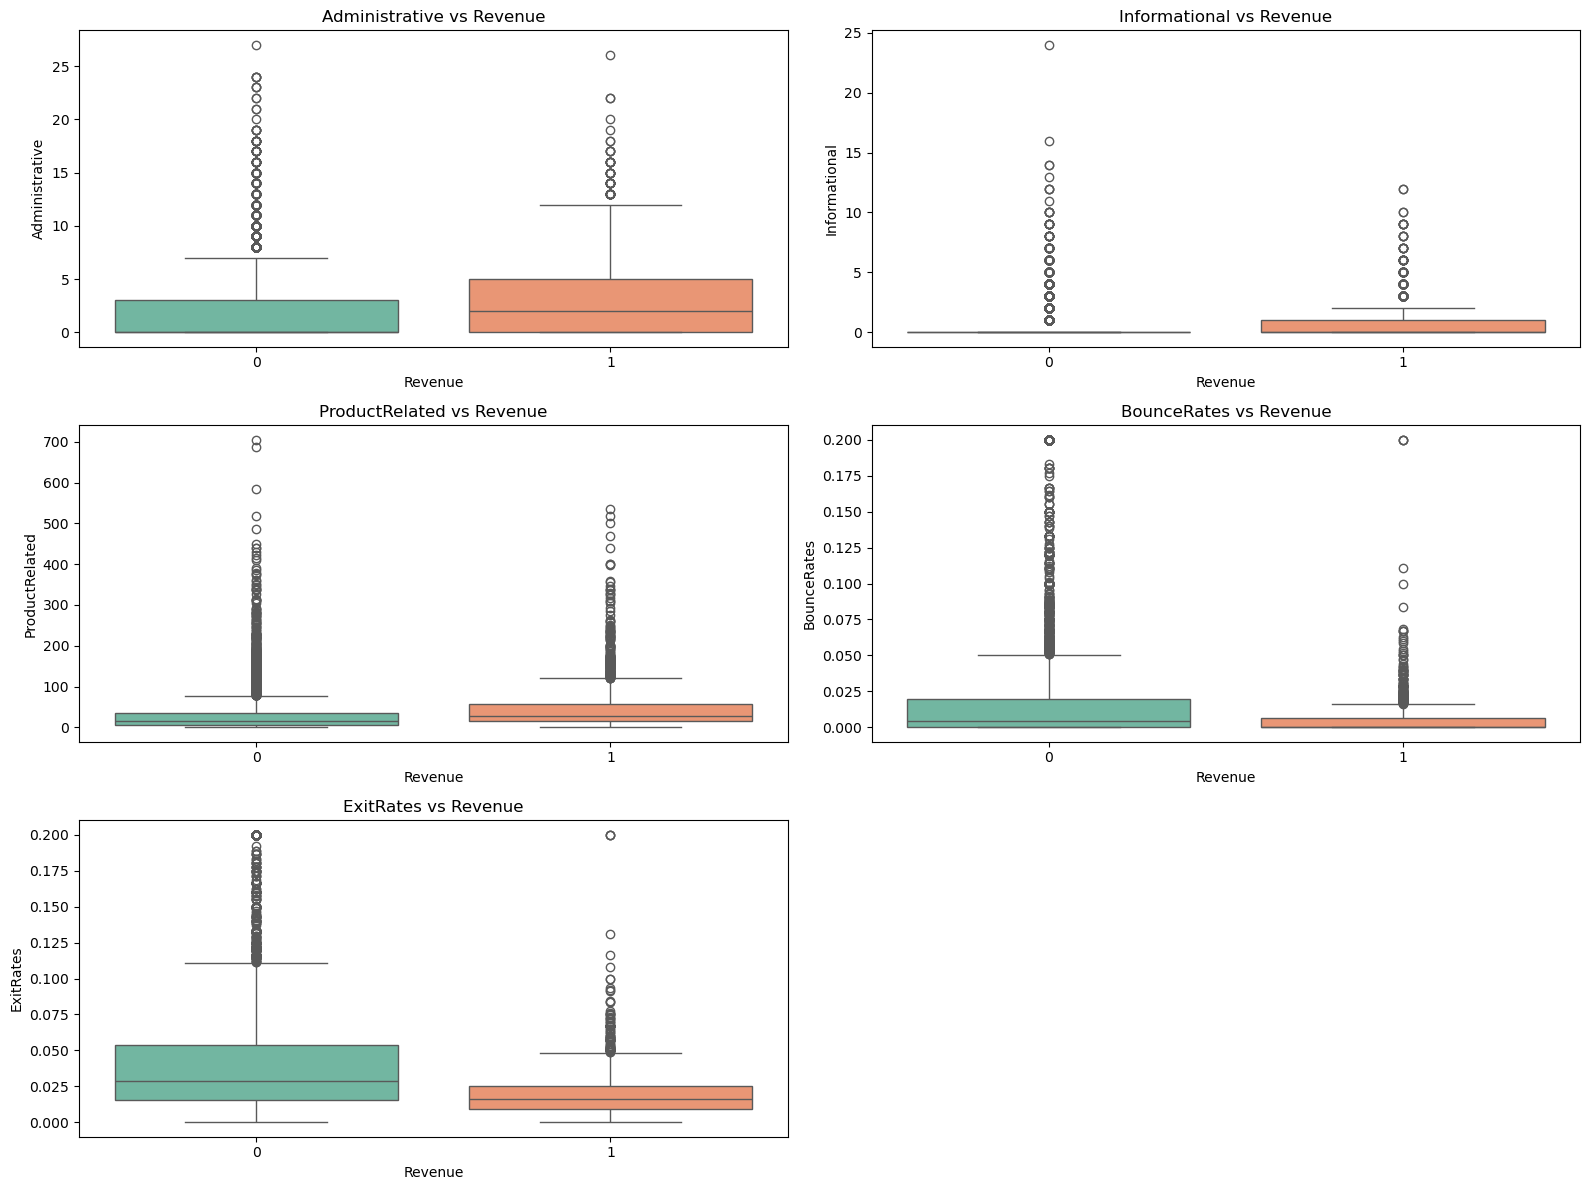

In [5]:
features = ['Administrative', 'Informational', 'ProductRelated', 'BounceRates', 'ExitRates']

plt.figure(figsize=(16, 12))
for i, col in enumerate(features):
    plt.subplot(3, 2, i+1)
    sns.boxplot(data=df, x='Revenue', y=col, palette='Set2')
    plt.title(f'{col} vs Revenue')

plt.tight_layout()
plt.show()


C:\Users\PMLS\AppData\Local\Temp\ipykernel_14040\3419071901.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='VisitorType', y='Revenue', estimator='mean', palette='viridis')


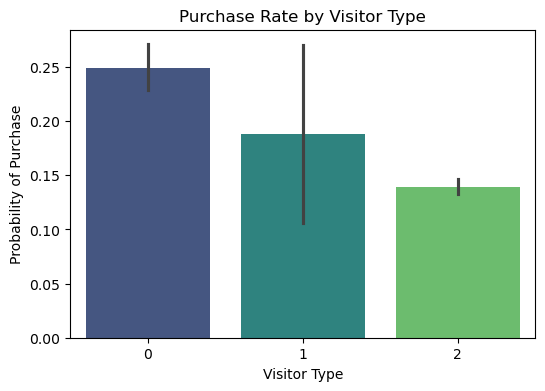

In [6]:
plt.figure(figsize=(6, 4))
sns.barplot(data=df, x='VisitorType', y='Revenue', estimator='mean', palette='viridis')
plt.title("Purchase Rate by Visitor Type")
plt.ylabel("Probability of Purchase")
plt.xlabel("Visitor Type")
plt.show()


C:\Users\PMLS\AppData\Local\Temp\ipykernel_14040\2843911842.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='Weekend', y='Revenue', estimator='mean', palette='coolwarm')


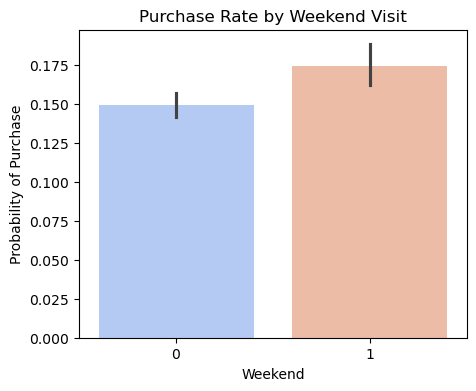

In [7]:
plt.figure(figsize=(5, 4))
sns.barplot(data=df, x='Weekend', y='Revenue', estimator='mean', palette='coolwarm')
plt.title("Purchase Rate by Weekend Visit")
plt.ylabel("Probability of Purchase")
plt.xlabel("Weekend")
plt.show()


C:\Users\PMLS\AppData\Local\Temp\ipykernel_14040\1493907951.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='Month', y='Revenue', estimator='mean', palette='magma')


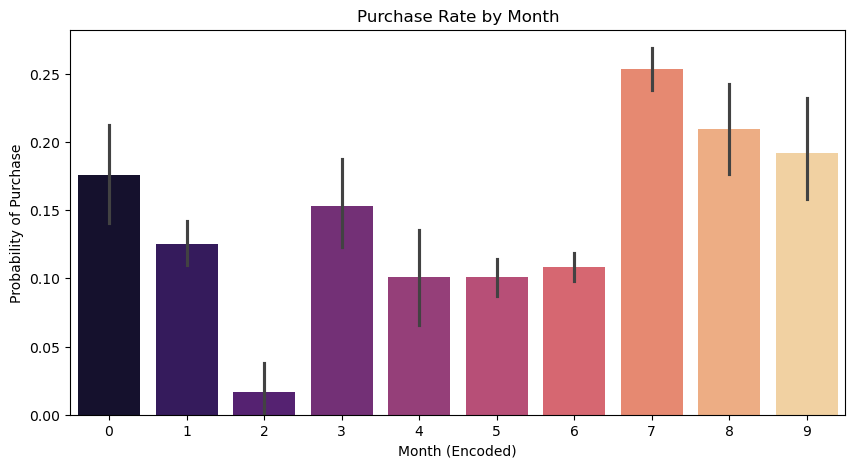

In [8]:
plt.figure(figsize=(10, 5))
sns.barplot(data=df, x='Month', y='Revenue', estimator='mean', palette='magma')
plt.title("Purchase Rate by Month")
plt.ylabel("Probability of Purchase")
plt.xlabel("Month (Encoded)")
plt.show()


In [9]:
from sklearn.model_selection import train_test_split

# Split into features and target
X = df.drop('Revenue', axis=1)
y = df['Revenue']

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [10]:
!pip install xgboost

In [11]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report

# Initialize and train the model
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb.fit(X_train, y_train)

# Make predictions
y_pred = xgb.predict(X_test)


C:\Users\PMLS\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [23:29:46] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [12]:
# Accuracy
print("✅ Accuracy: {:.2f}%".format(accuracy_score(y_test, y_pred) * 100))

# Other metrics
print("📊 Precision:", precision_score(y_test, y_pred))
print("📈 Recall:", recall_score(y_test, y_pred))
print("📉 F1 Score:", f1_score(y_test, y_pred))
print("🔥 ROC AUC:", roc_auc_score(y_test, y_pred))

# Classification Report
print("\n📋 Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
print("\n🧩 Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


✅ Accuracy: 88.93%
📊 Precision: 0.6697819314641744
📈 Recall: 0.56282722513089
📉 F1 Score: 0.6116642958748222
🔥 ROC AUC: 0.7559817507612223

📋 Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.95      0.94      2084
           1       0.67      0.56      0.61       382

    accuracy                           0.89      2466
   macro avg       0.80      0.76      0.77      2466
weighted avg       0.88      0.89      0.89      2466


🧩 Confusion Matrix:
[[1978  106]
 [ 167  215]]


🔹 Accuracy: 0.889294403892944
🔹 Precision: 0.6697819314641744
🔹 Recall: 0.56282722513089
🔹 F1 Score: 0.6116642958748222

🔹 Classification Report:

              precision    recall  f1-score   support

           0       0.92      0.95      0.94      2084
           1       0.67      0.56      0.61       382

    accuracy                           0.89      2466
   macro avg       0.80      0.76      0.77      2466
weighted avg       0.88      0.89      0.89      2466



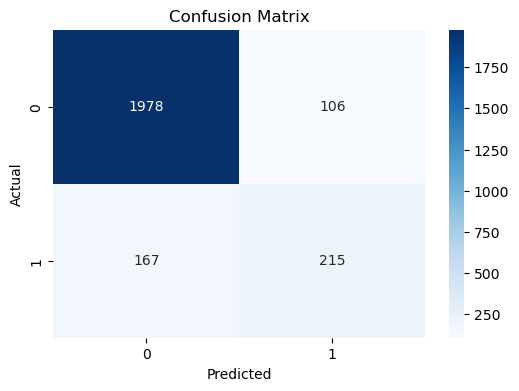

In [13]:
# Evaluate the model
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Accuracy
print("🔹 Accuracy:", accuracy_score(y_test, y_pred))

# Precision, Recall, F1
print("🔹 Precision:", precision_score(y_test, y_pred))
print("🔹 Recall:", recall_score(y_test, y_pred))
print("🔹 F1 Score:", f1_score(y_test, y_pred))

# Classification Report
print("\n🔹 Classification Report:\n")
print(classification_report(y_test, y_pred))

# Confusion Matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


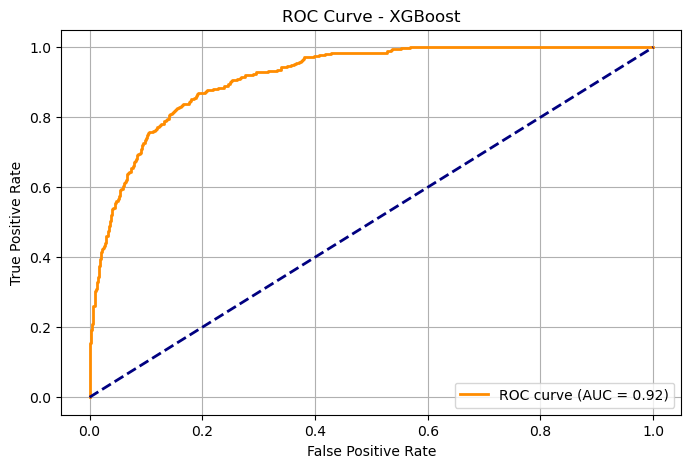

In [14]:
from sklearn.metrics import roc_curve, auc

# Predicted probabilities
y_probs = xgb.predict_proba(X_test)[:, 1]  # get probabilities for class 1

# ROC values
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure(figsize=(8, 5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - XGBoost')
plt.legend(loc="lower right")
plt.grid()
plt.show()


In [15]:
# Optional: Export cleaned features and target
df.to_csv("Cleaned_Online_Shopper_Data.csv", index=False)
